In [1]:
! pip install scikit-learn-extra
! pip install kmodes

In [75]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster._kmeans import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
sns.set()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)


In [76]:

data = pd.read_csv("chargesCountByMembers.csv", low_memory = False,sep=';')

data

,member_noSource,charge,amt
0,5834,187,553699.3
1,2917,51,134934.9
2,7162,170,503910.2
3,1566,51,144733.2
4,2894,68,151584.2
...,...,...,...
9109,9738,612,1512959.4
9110,5410,153,511919.1
9111,9197,510,1492852.2
9112,541,34,99167.8


In [56]:

members_reg_gen = pd.read_csv("members-regions-gender.csv",low_memory=False,sep=';')

members_reg_gen

,member_noSource,region_noSource,gender
0,6114,5,1
1,6059,9,0
2,7618,7,1
3,569,9,0
4,1152,7,1
...,...,...,...
9995,5437,7,0
9996,9485,6,0
9997,9720,8,1
9998,8895,2,0


In [77]:

source_mem = data['member_noSource']

df_new=  data.drop('member_noSource',axis=1)

source_mem

0       5834
1       2917
2       7162
3       1566
4       2894
        ... 
9109    9738
9110    5410
9111    9197
9112     541
9113    5951
Name: member_noSource, Length: 9114, dtype: int64

In [78]:

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_new)
df = pd.DataFrame(x_scaled)

df['member_noSource'] = source_mem

df

,0,1,member_noSource
0,0.091743,0.119339,5834
1,0.018349,0.029075,2917
2,0.082569,0.108607,7162
3,0.018349,0.031187,1566
4,0.027523,0.032664,2894
...,...,...,...
9109,0.321101,0.326106,9738
9110,0.073394,0.110333,5410
9111,0.266055,0.321772,9197
9112,0.009174,0.021366,541


In [59]:
d = pd.merge(df,members_reg_gen,left_on='member_noSource',right_on='member_noSource',how="inner")

d

,0,1,member_noSource,region_noSource,gender
0,0.091743,0.119339,5834,2,1
1,0.018349,0.029075,2917,2,0
2,0.082569,0.108607,7162,5,1
3,0.018349,0.031187,1566,9,1
4,0.027523,0.032664,2894,3,1
...,...,...,...,...,...
9109,0.321101,0.326106,9738,6,1
9110,0.073394,0.110333,5410,9,1
9111,0.266055,0.321772,9197,3,0
9112,0.009174,0.021366,541,5,0


In [79]:
lastData=df.copy()

lastData.fillna(0, inplace=True)

lastData = lastData.drop('member_noSource',axis=1)

lastData

,0,1
0,0.091743,0.119339
1,0.018349,0.029075
2,0.082569,0.108607
3,0.018349,0.031187
4,0.027523,0.032664
...,...,...
9109,0.321101,0.326106
9110,0.073394,0.110333
9111,0.266055,0.321772
9112,0.009174,0.021366


In [88]:
wcss = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, random_state=0)
    kMeans.fit(lastData)
    wcss.append(kMeans.inertia_)


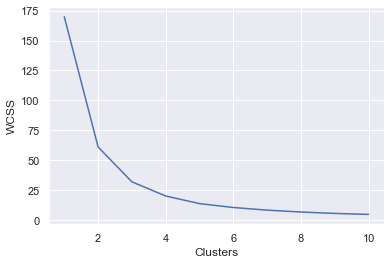

In [89]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
kMeans = KMeans(n_clusters=3, random_state=0)
clust = kMeans.fit_predict(lastData)
data.insert(0, "Cluster", clust, True)

In [96]:
data

,Cluster,member_noSource,charge,amt
0,0,5834,187,553699.3
1,1,2917,51,134934.9
2,1,7162,170,503910.2
3,1,1566,51,144733.2
4,1,2894,68,151584.2
...,...,...,...,...
9109,2,9738,612,1512959.4
9110,1,5410,153,511919.1
9111,2,9197,510,1492852.2
9112,1,541,34,99167.8


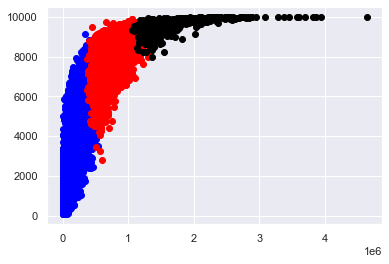

In [102]:
d=data

x = 'charge'
s = 'amt'
y ='member_noSource'

red = d[d["Cluster"] == 0]
blue = d[d["Cluster"]== 1]
black = d[d["Cluster"] == 2]

# Create a scatter plot of the data
plt.scatter(blue.loc[:,[x,s]].sum(axis=1), blue[y], color='blue')
plt.scatter(red.loc[:,[x,s]].sum(axis=1), red[y], color='red')

plt.scatter(black.loc[:,[x,s]].sum(axis=1), black[y], color='black')

# Show the plot
plt.show()